In [1]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
print("Keras version:", tf.keras.__version__)

TensorFlow version: 2.17.0
Keras version: 3.5.0


In [29]:
import pandas as pd
!pip install scikit-learn

   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
    --------------------------------------- 0.3/11.0 MB ? eta -:--:--
   ------ --------------------------------- 1.8/11.0 MB 5.0 MB/s eta 0:00:02
   ------------ --------------------------- 3.4/11.0 MB 6.1 MB/s eta 0:00:02
   ---------------- ----------------------- 4.5/11.0 MB 5.7 MB/s eta 0:00:02
   -------------------- ------------------- 5.5/11.0 MB 5.5 MB/s eta 0:00:01
   ----------------------- ---------------- 6.6/11.0 MB 5.4 MB/s eta 0:00:01
   -------------------------- ------------- 7.3/11.0 MB 5.2 MB/s eta 0:00:01
   ----------------------------- ---------- 8.1/11.0 MB 5.0 MB/s eta 0:00:01
   --------------------------------- ------ 9.2/11.0 MB 4.8 MB/s eta 0:00:01
   ------------------------------------ --- 10.0/11.0 MB 4.8 MB/s eta 0:00:01
   ---------------------------------------  10.7/11.0 MB 4.7 MB/s eta 0:00:01
   ---------------------------------------- 11.0/11.0 MB 4.4 MB/s eta 0:00:00
   -------

DEPRECATION: Loading egg at c:\users\dhana\miniconda3\envs\git_pw\lib\site-packages\breast_cancer-0.1.0-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [4]:
df = pd.read_csv("wine.csv")

In [5]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [46]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1:-1]

In [47]:
y.ndim

2

In [48]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()

In [50]:
y = encoder.fit_transform(y[0])

KeyError: 0

In [51]:
categorical_cols = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df, columns=categorical_cols)

In [52]:
df_encoded.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_bad,quality_good
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,True,False
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,True,False
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,True,False
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,False,True
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,True,False


In [56]:
X = df_encoded.iloc[:,:-1]
y = df_encoded.iloc[:,-1:]


In [59]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [60]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42)

# Now split the remaining 30% into 50% validation and 50% test
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42)


In [61]:
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (1119, 12) (1119, 1)
Validation set shape: (240, 12) (240, 1)
Test set shape: (240, 12) (240, 1)


In [62]:
# Initialize the StandardScaler
scaler = StandardScaler()
'''
X_train_scaled.shape gives the shape of the X_train_scaled array, which is typically represented as (n_samples, n_features), where:
n_samples is the number of rows (data points).
n_features is the number of columns (features or input variables).
'''

In [1]:
X_train_scaled = scaler.fit_transform(X_train)

# Transform the validation and test data using the scaler (without fitting again)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

NameError: name 'scaler' is not defined

In [68]:
X_train_scaled.shape

(1119, 12)

In [81]:
Layers = [tf.keras.Input(shape=(X_train_scaled.shape[1],)),
          tf.keras.layers.Dense(64,activation='relu',name='hidden1'),
          tf.keras.layers.Dense(32,activation='relu',name='hidden2'),
          tf.keras.layers.Dense(1,activation='sigmoid',name='output')]

In [82]:
model_clf = tf.keras.models.Sequential(Layers)

In [83]:
model_clf.compile(
    optimizer='adam',
    loss = 'binary_crossentropy',
    metrics=['accuracy']
)

In [84]:
model_clf.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden1 (Dense)                 │ (None, 64)             │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,945 (11.50 KB)

 Trainable params: 2,945 (11.50 KB)

 Non-trainable params: 0 (0.00 B)

In [85]:
import tensorflow as tf
from datetime import datetime

# Step 1: Set up the log directory for TensorBoard logs
log_dir = "logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")

# Step 2: Create a TensorBoard callback
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

# Step 3: Train the model and include the TensorBoard callback
history = model_clf.fit(
    X_train_scaled, 
    y_train, 
    validation_data=(X_val_scaled, y_val),  # Include validation data for monitoring
    epochs=20, 
    callbacks=[tensorboard_callback]  # In
    clude TensorBoard callback
)

# After training, use TensorBoard to visualize the training process


Epoch 1/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.5876 - loss: 0.6618 - val_accuracy: 0.8917 - val_loss: 0.5048
Epoch 2/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9543 - loss: 0.4097 - val_accuracy: 0.9500 - val_loss: 0.2844
Epoch 3/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9718 - loss: 0.2164 - val_accuracy: 1.0000 - val_loss: 0.1137
Epoch 4/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 0.0813 - val_accuracy: 1.0000 - val_loss: 0.0408
Epoch 5/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0290 - val_accuracy: 1.0000 - val_loss: 0.0199
Epoch 6/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0152 - val_accuracy: 1.0000 - val_loss: 0.0112
Epoch 7/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0088 - val_accuracy: 1.0000 - val_loss: 0.0073
Epoch 8/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0058 - val_accuracy: 1.0000 - val_loss

In [87]:
from tensorflow.keras.callbacks import EarlyStopping

In [89]:
early_stopping_callback = EarlyStopping(
    monitor= 'val_loss',
    patience = 3,
    restore_best_weights = True
)

In [92]:
history = model_clf.fit(
    X_train_scaled,
    y_train,
    validation_data=(X_val_scaled,y_val),
    callbacks=[tensorboard_callback,early_stopping_callback]
)

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 3.2587e-04 - val_accuracy: 1.0000 - val_loss: 3.8101e-04


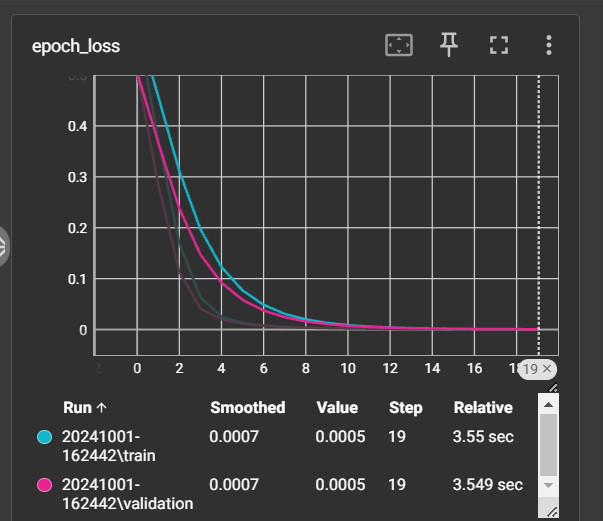

In [97]:
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='model_best.keras',
    monitor='val_loss',
    save_best_only=True,
    mode='min',
    verbose=1
)

In [99]:
# Step 2: Train your model and include the ModelCheckpoint callback
history = model_clf.fit(
    X_train_scaled,
    y_train,
    validation_data=(X_val_scaled, y_val),
    epochs=20,
    callbacks=[tensorboard_callback, checkpoint_callback,early_stopping_callback]  # Include both TensorBoard and ModelCheckpoint
)

Epoch 1/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 7.0293e-05 
Epoch 1: val_loss improved from 0.00008 to 0.00008, saving model to model_best.keras
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 7.0070e-05 - val_accuracy: 1.0000 - val_loss: 7.6255e-05
Epoch 2/20
 1/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 1.0000 - loss: 6.0954e-05
Epoch 2: val_loss improved from 0.00008 to 0.00007, saving model to model_best.keras
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 5.9606e-05 - val_accuracy: 1.0000 - val_loss: 7.2411e-05
Epoch 3/20
 1/35 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 1.0000 - loss: 5.3527e-05
Epoch 3: val_loss improved from 0.00007 to 0.00007, saving model to model_best.keras
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 5.6989e-05 - val_accuracy: 1.0000 - val_loss: 6.8731e-05
Epoch 4/20
33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 5.0014e-05 
Epoch 4: val_loss im

In [100]:
model_clf.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden1 (Dense)                 │ (None, 64)             │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,837 (34.52 KB)

 Trainable params: 2,945 (11.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,892 (23.02 KB)

In [102]:
weights = model_clf.get_weights()

In [104]:
for i, weight in enumerate(weights):
    print(f"Layer {i+1} weights shape: {weight.shape}")

Layer 1 weights shape: (12, 64)
Layer 2 weights shape: (64,)
Layer 3 weights shape: (64, 32)
Layer 4 weights shape: (32,)
Layer 5 weights shape: (32, 1)
Layer 6 weights shape: (1,)


In [106]:
history_df = pd.DataFrame(history.history)

In [108]:
history_df.tail()

,accuracy,loss,val_accuracy,val_loss
15,1.0,0.000030,1.0,0.000038
16,1.0,0.000029,1.0,0.000036
17,1.0,0.000028,1.0,0.000035
18,1.0,0.000027,1.0,0.000033
19,1.0,0.000026,1.0,0.000032


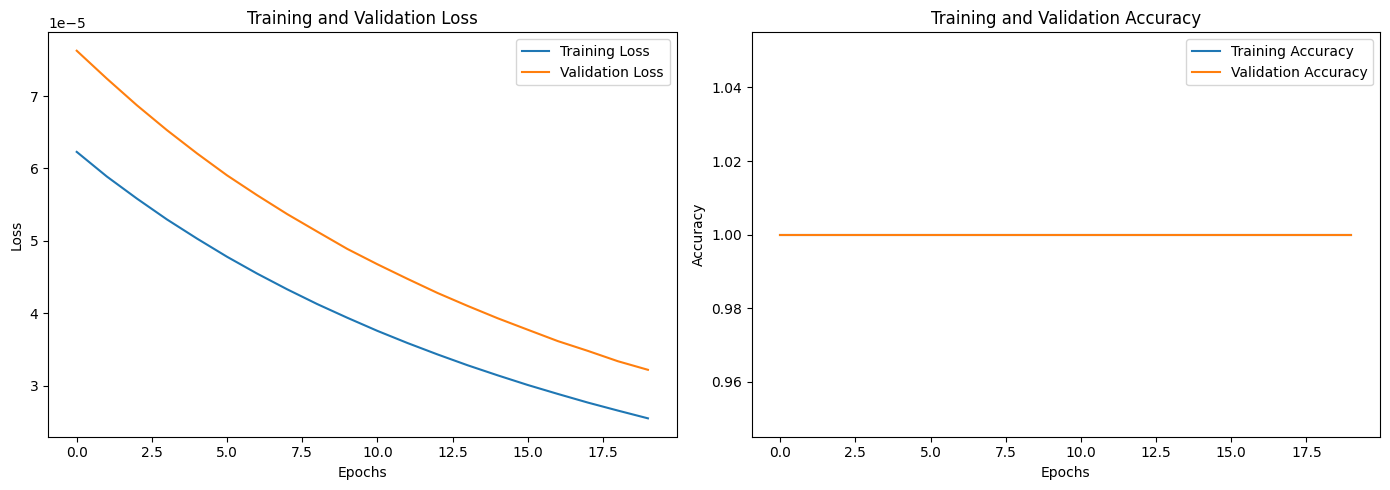

In [109]:
import matplotlib.pyplot as plt

# Assuming history_df is already created from the training history
# Example:
# history_df = pd.DataFrame(history.history)

# Plotting Training and Validation Loss
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.plot(history_df['loss'], label='Training Loss')
plt.plot(history_df['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting Training and Validation Accuracy
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.plot(history_df['accuracy'], label='Training Accuracy')
plt.plot(history_df['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


In [111]:

# Evaluate the model on the test data
test_loss, test_accuracy = model_clf.evaluate(X_test_scaled, y_test)

# Print the test results
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 2.7891e-05 
Test Loss: 0.0000
Test Accuracy: 1.0000
